<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#To-convert-immune-score-to-percentages-using-in-silico-simulation" data-toc-modified-id="To-convert-immune-score-to-percentages-using-in-silico-simulation-1">To convert immune score to percentages using in silico simulation</a></span></li></ul></div>

# To convert immune score to percentages using in silico simulation

In [1]:
library(ggplot2)
library(stats)

In [4]:
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

In [6]:
sims <- read.table(paste0(datapath, "ESTIMATE/simulations/ESTIMATE_simulation_pure.txt"),
                  header = T, stringsAsFactors = F)

In [7]:
sims

Infiltration_percentage,StromalScore,ImmuneScore,ESTIMATEScore,simulation
<int>,<dbl>,<dbl>,<dbl>,<chr>
4,-2649.727,-785.61380,-3435.34070,simulation_1
8,-2586.353,-83.17307,-2669.52646,simulation_1
12,-2535.314,457.15530,-2078.15880,simulation_1
16,-2484.590,884.67960,-1599.91020,simulation_1
20,-2436.727,1249.48200,-1187.24500,simulation_1
24,-2388.342,1552.98530,-835.35650,simulation_1
28,-2342.591,1822.99570,-519.59490,simulation_1
32,-2294.258,2061.46550,-232.79270,simulation_1
36,-2243.230,2265.15294,21.92277,simulation_1


In [8]:
simplot <- 
ggplot(sims, aes(x = ImmuneScore, y = Infiltration_percentage))+
geom_point(size = 5) +
geom_smooth(method="nls",size = 3,
            formula=y ~ (a*exp((x)*m)),
            method.args = list(start=c(a=1, m=0)),
            se=F) +                                                               
theme(axis.title.x = element_text(size = 28),
      axis.title.y = element_text(size = 28),
      axis.line = element_line(color = "black"),
      axis.text = element_text(size = 28)) +
theme(panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_rect(fill = "transparent",colour = NA),
      panel.border=element_blank(),
      legend.key = element_rect(fill = "white", 
                                colour = "white"),
      plot.margin = unit(c(0.2,0,0,0),"cm")) +
scale_y_continuous(breaks = seq(0,100, by = 10), limits = c(0,100))


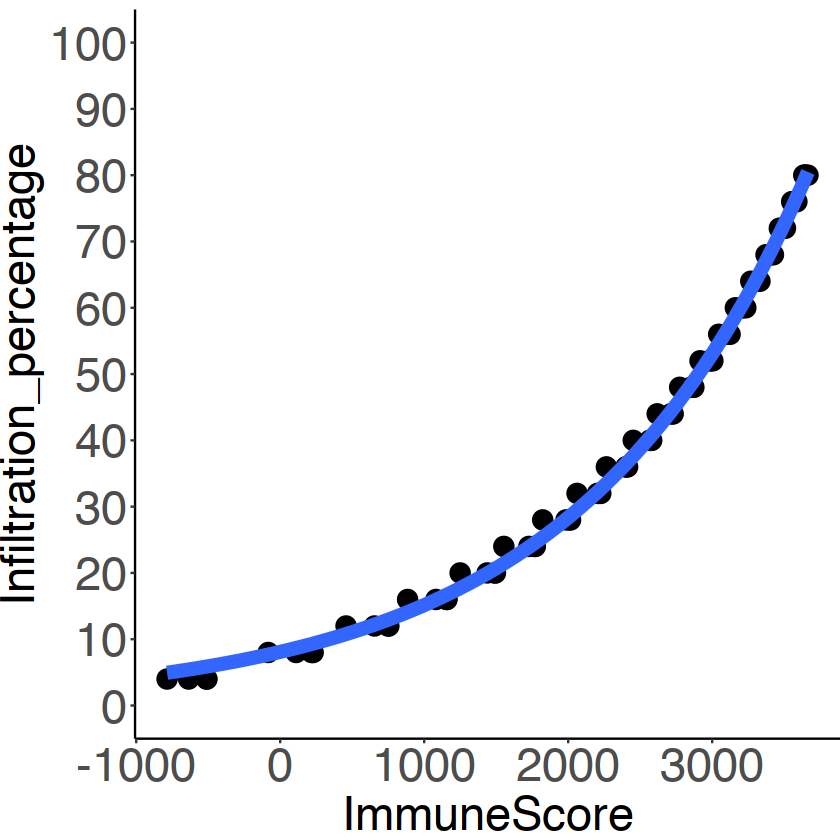

In [9]:
simplot

In [10]:
fit_nls = nls(Infiltration_percentage ~ a*exp(ImmuneScore*b), 
              sims, start=list(a=1,b=0))

In [11]:
summary(fit_nls)


Formula: Infiltration_percentage ~ a * exp(ImmuneScore * b)

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 8.095e+00  1.286e-01   62.93   <2e-16 ***
b 6.267e-04  4.956e-06  126.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.136 on 78 degrees of freedom

Number of iterations to convergence: 9 
Achieved convergence tolerance: 4.202e-07


In [246]:
if(file.exists(paste(plotpath,"ESTIMATE_simulation_fit.pdf", sep = ""))){
    message("file exists!")
} else{
    pdf(file = paste(plotpath,"ESTIMATE_simulation_fit.pdf", sep = ""),
        width = 10, 
        height = 10,
        useDingbats = FALSE)
    print(simplot)
    dev.off()
    }

pdf 
  2